# SUBMISSION 1 - Machine Learning Terapan SIB Dicoding Batch 3

---


## PREDIKSI GAGAL JANTUNG

**Nama : Rosyiidah Hasnaa**

**Study Group : M02** 

### **Data Loading**

In [1]:
#membaca dataset
import pandas as pd

hearts = pd.read_csv('heart.csv')
hearts.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


### **Data Exploratory**


In [2]:
#mengenali jenis variabel pada heart dataset
hearts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [3]:
#mengetahui informasi statistik pada masing-masing kolom
hearts.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [4]:
#melakukan pengecekan apakah terdapat missing value dalam dataset
hearts.isnull().sum().sort_values(ascending=False)

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

Dari proses pengecekan missing value diatas, didapatkan bahwasanya tidak ada missing value dari dataset tersebut.


####**Univariate Exploratory Data Analysis**
Melihat Distribusi Fitur Fitur dalam hearts dataset

**1. Melihat distribusi fitur Sex dalam dataset**

M    725
F    193
Name: Sex, dtype: int64


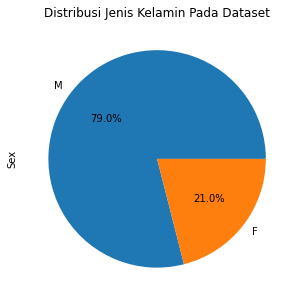

In [5]:
count=hearts["Sex"].value_counts()
print(count)
count.plot(kind='pie', title='Distribusi Jenis Kelamin Pada Dataset',autopct='%1.1f%%', figsize=(5,5));

**2. Melihat Distribusi Fitur ChestPainType(Jenis Nyeri Dada) pada dataset**

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64


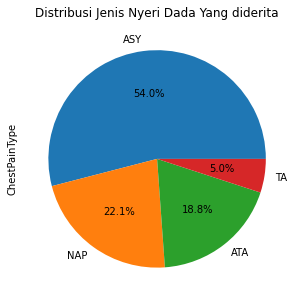

In [6]:
count= hearts["ChestPainType"].value_counts()
print(count)
count.plot(kind='pie', title='Distribusi Jenis Nyeri Dada Yang diderita',autopct='%1.1f%%', figsize=(5,5));

**3. Melihat Distribusi Fitur RestingECG pada dataset**

Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64


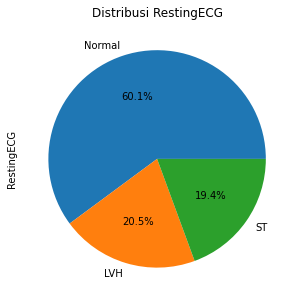

In [7]:
count= hearts["RestingECG"].value_counts()
print(count)
count.plot(kind='pie', title='Distribusi RestingECG',autopct='%1.1f%%', figsize=(5,5));

**4. Melihat Distribusi Fitur ST_Slope pada dataset**

Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64


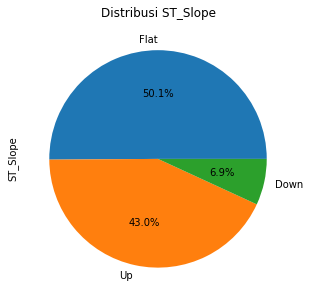

In [8]:
count= hearts["ST_Slope"].value_counts()
print(count)
count.plot(kind='pie', title='Distribusi ST_Slope',autopct='%1.1f%%', figsize=(5,5));

**5. Melihat Distribusi Fitur Fitur Numerikal dalam Dataset**

Fitur numerikal meliputi Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak dan targetnya yang berupa nilai numerik yaitu HeartDisease

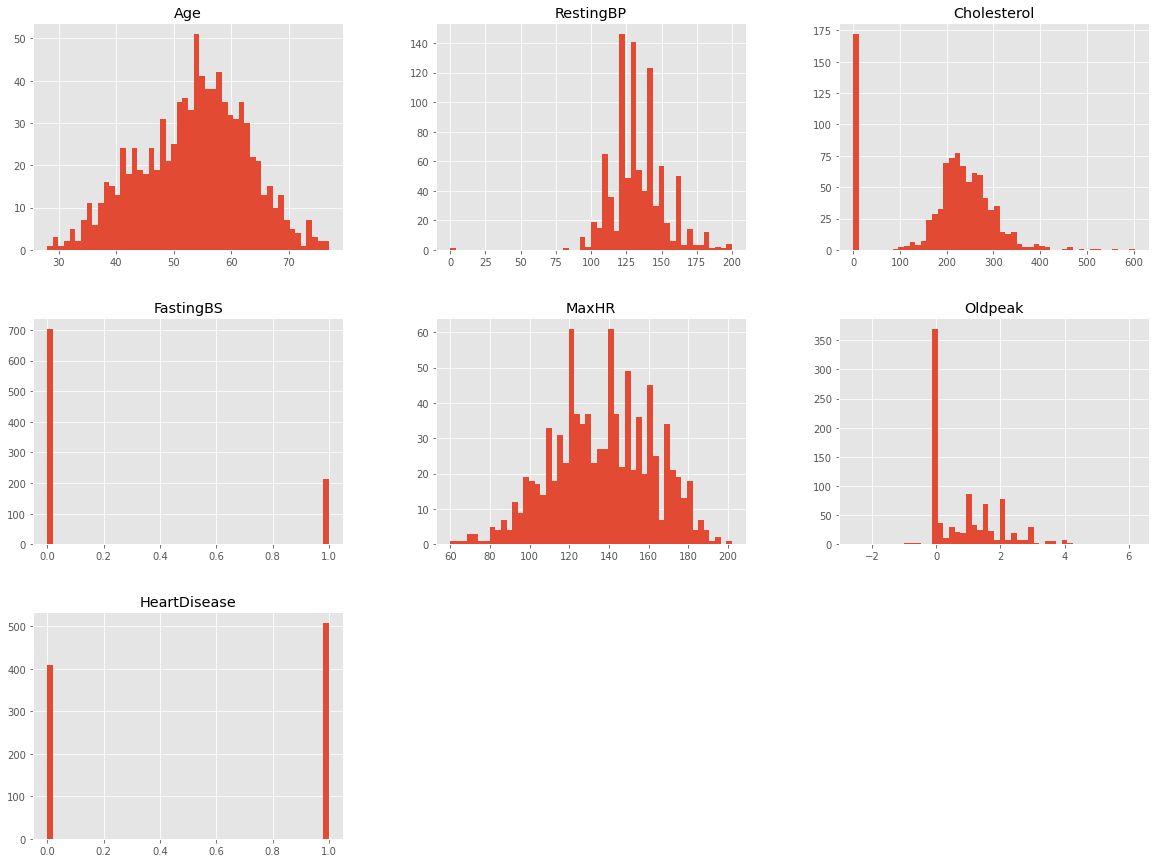

In [9]:
import matplotlib.pyplot as plt
import matplotlib 
matplotlib.style.use('ggplot')

hearts.hist(bins=50, figsize=(20,15))
plt.show()

###**Multivariate Exploratory Data Analysis**
Multivariate EDA menunjukkan hubungan antara dua atau lebih variabel pada data. Berfungsi untuk mengetahui hubungan antar fitur



**Memisahkan data kategorikal, data numerikal, dan target**

In [10]:
#target
target="HeartDisease"

#data kategorikal
cat_features = hearts.select_dtypes(include='object').columns.to_list()

#data numerikal
num_features = hearts.drop([target],axis =1)
num_features = num_features.select_dtypes(include='number').columns.to_list()

print(cat_features)
print(num_features)
print(target)

['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']
HeartDisease


**Melihat hubungan fitur kategorikal dengan target HeartDisease**


Presentase hubungan antara gagal jantung terhadap - Sex


Sex  HeartDisease
F    0               15.58
     1                5.45
M    0               29.08
     1               49.89
Name: Sex, dtype: float64


Presentase hubungan antara gagal jantung terhadap - ChestPainType


ChestPainType  HeartDisease
ASY            0               11.33
               1               42.70
ATA            0               16.23
               1                2.61
NAP            0               14.27
               1                7.84
TA             0                2.83
               1                2.18
Name: ChestPainType, dtype: float64


Presentase hubungan antara gagal jantung terhadap - RestingECG


RestingECG  HeartDisease
LVH         0                8.93
            1               11.55
Normal      0               29.08
            1               31.05
ST          0                6.64
            1               12.75
Name: RestingECG, dtype: float64


Presentase hubungan antara gagal jantung terhadap - ExerciseAngina


ExerciseAngina  HeartDisease
N               0               38.67
                1               20.92
Y               0                5.99
                1               34.42
Name: ExerciseAngina, dtype: float64


Presentase hubungan antara gagal jantung terhadap - ST_Slope


ST_Slope  HeartDisease
Down      0                1.53
          1                5.34
Flat      0                8.61
          1               41.50
Up        0               34.53
          1                8.50
Name: ST_Slope, dtype: float64

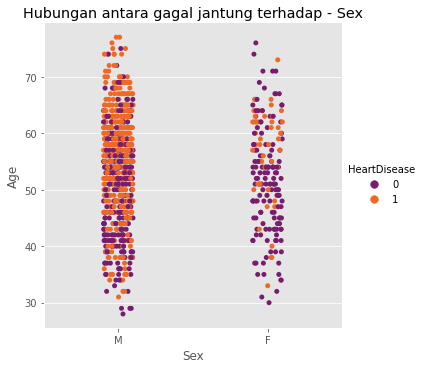

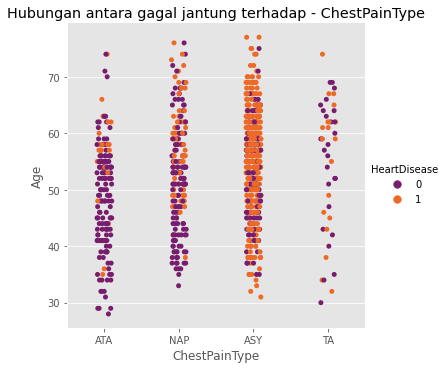

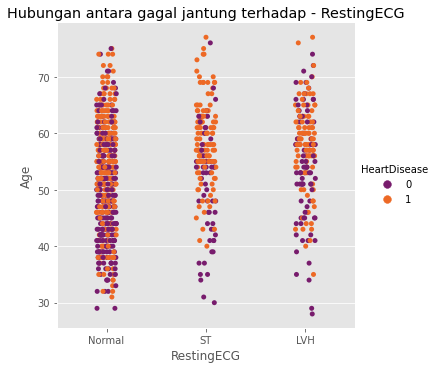

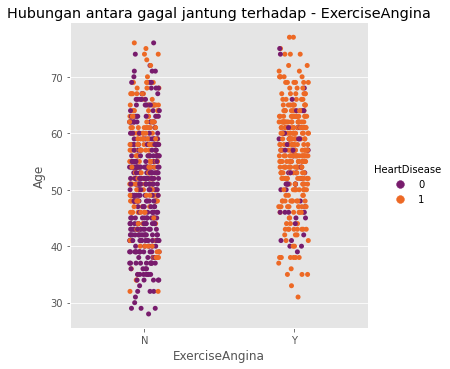

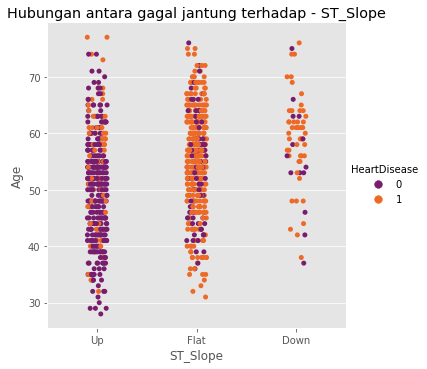

In [11]:
import seaborn as sns

for col in cat_features:
  sns.catplot(y="Age", x=col, hue=target, data=hearts, palette="inferno");
  plt.title("Hubungan antara gagal jantung terhadap - {}".format(col))
  print("\nPresentase hubungan antara gagal jantung terhadap - {}".format(col))
  percent = (100*hearts.groupby([col,target])[col].count()/hearts[col].count()).round(2)
  percent.columns = [col,target,'Pecent(%)']
  display(percent)

**Hubungan Fitur Numerikal dengan Penyakit Gagal Jantung**

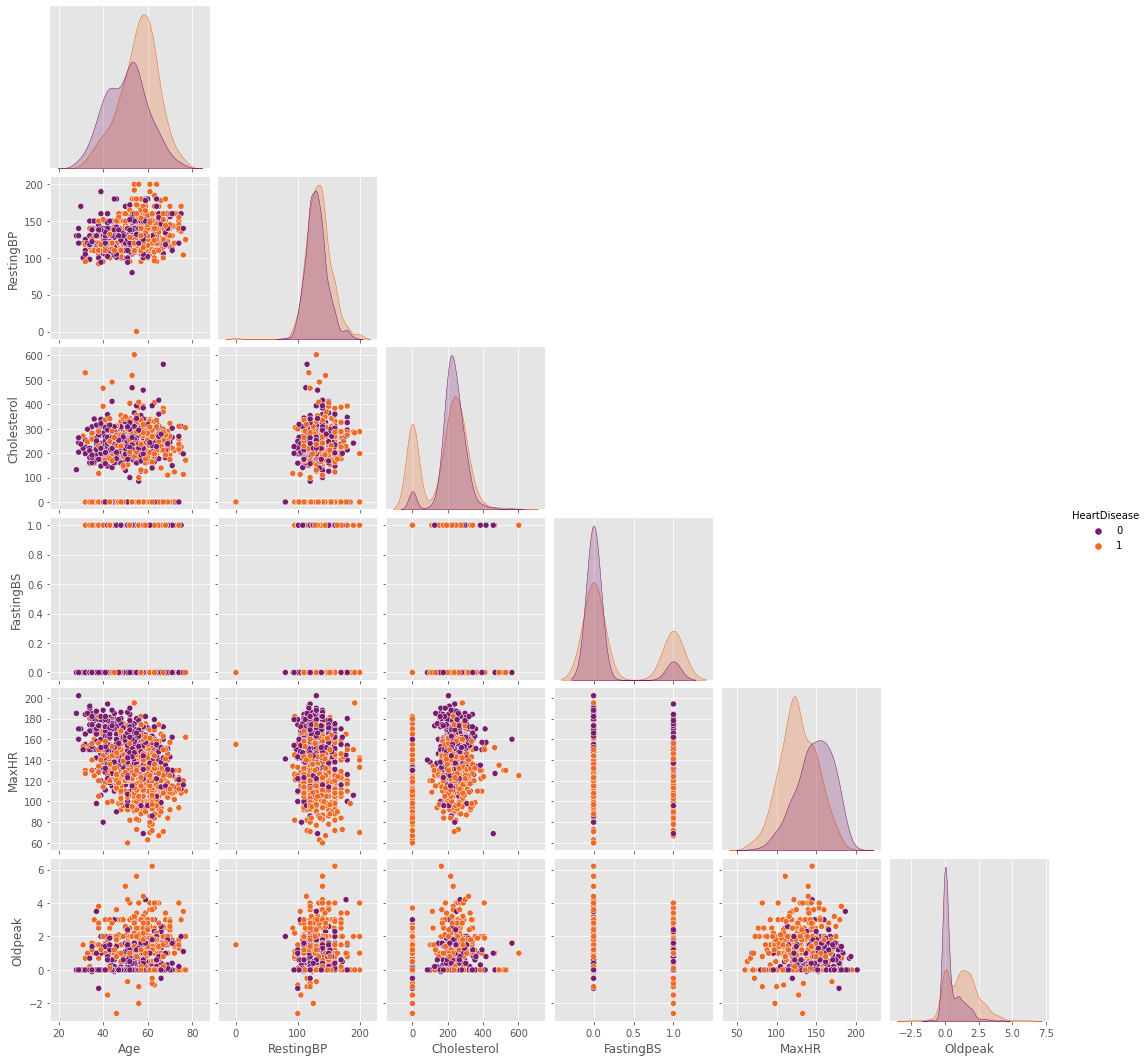

In [12]:
sns.pairplot(hearts, hue=target, palette="inferno", corner=True);

**Pengecekan korelasi tiap fitur dengan target menggunakan fungsi corr yang tersedia pada library pandas.**

In [13]:
import plotly.express as px

correlation_matrix = hearts.corr().round(2)
px.imshow(correlation_matrix,title="Matriks Kolerasi Prediksi Gagal Jantung")

###**DATA PREPOCESSING**

**1. Encoding Fitur Kategori**

In [14]:
from sklearn.preprocessing import  OneHotEncoder

for category in cat_features:
  hearts = pd.concat([hearts, pd.get_dummies(hearts[category], prefix=category)],axis=1)
  hearts.drop(category, axis=1, inplace=True)

hearts.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,1,0,0,...,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,1,0,1,...,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1


**2. Membagi dataset kedalam dataset dan data train**

In [15]:
from sklearn.model_selection import train_test_split
 
X = hearts.drop(["HeartDisease"],axis =1)
y = hearts["HeartDisease"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 918
Total # of sample in train dataset: 734
Total # of sample in test dataset: 184


**3. Standarisasi Fitur Numerik**

In [16]:
from sklearn.preprocessing import StandardScaler
 
scaler = StandardScaler()
scaler.fit(X_train[num_features])
X_train[num_features] = scaler.transform(X_train.loc[:, num_features])
X_train[num_features].head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak
660,0.496396,0.419360,0.138748,1.894070,1.089750,-0.831836
426,0.285847,-0.341202,-0.267280,-0.527964,0.097052,-0.831836
338,1.022767,0.419360,-1.765071,1.894070,0.454423,1.003077
151,-0.556347,-1.753674,-0.330440,-0.527964,-1.491266,-0.831836
542,0.075298,0.310708,0.707187,-0.527964,-1.292726,0.544349


In [17]:
X_train.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
660,0.496396,0.419360,0.138748,1.894070,1.089750,-0.831836,0,1,0,0,1,0,1,0,0,1,0,0,0,1
426,0.285847,-0.341202,-0.267280,-0.527964,0.097052,-0.831836,0,1,0,1,0,0,0,0,1,1,0,0,0,1
338,1.022767,0.419360,-1.765071,1.894070,0.454423,1.003077,0,1,1,0,0,0,1,0,0,1,0,0,0,1
151,-0.556347,-1.753674,-0.330440,-0.527964,-1.491266,-0.831836,0,1,0,1,0,0,0,1,0,1,0,0,0,1
542,0.075298,0.310708,0.707187,-0.527964,-1.292726,0.544349,1,0,1,0,0,0,0,1,0,0,1,0,1,0


###**MODEL DEVELOPMENT**

In [18]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

logisticRegression=LogisticRegression()
logisticRegression.fit(X_train,y_train)

#naive bayes
from sklearn.naive_bayes import GaussianNB

naiveBayes=GaussianNB()
naiveBayes.fit(X_train,y_train)

#DTC
from sklearn.tree import DecisionTreeClassifier

dtc=DecisionTreeClassifier(criterion="entropy")
dtc.fit(X_train,y_train)

#RandomForest
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(n_estimators=200,criterion="entropy")
rf.fit(X_train,y_train)

#xbc
from xgboost import XGBClassifier

xbc=XGBClassifier()
xbc.fit(X_train,y_train)

XGBClassifier()

###**EVALUASI MODEL**

In [20]:
#import matriks evaluasi yang akan digunakan
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

# Buat dataframe yang mengandung nilai matriks evaluasi masing-masing algoritma
clf = pd.DataFrame(columns=['Accuracy', 'Precision','Recall','F1-score'], 
                   index=['LogisticRegression','NaiveBayes','DecisionTree','RandomForest','XgBoost'])

# Buat dictionary untuk setiap algoritma yang digunakan
model_dict = {'LogisticRegression': logisticRegression, 'NaiveBayes': naiveBayes,
              'DecisionTree':dtc,'RandomForest':rf,'XgBoost':xbc }
 
# Hitung Matriks Evaluasi tiap algoritma
for name, model in model_dict.items():
    clf.loc[name, 'Accuracy'] = accuracy_score(y_test, y_pred=model.predict(X_test))
    clf.loc[name, 'Precision'] = precision_score(y_test, y_pred=model.predict(X_test))
    clf.loc[name, 'Recall'] = recall_score(y_test, y_pred=model.predict(X_test))
    clf.loc[name, 'F1-score'] = f1_score(y_test, y_pred=model.predict(X_test)) 
    
# Panggil clf
clf

,Accuracy,Precision,Recall,F1-score
LogisticRegression,0.527174,0.944444,0.165049,0.280992
NaiveBayes,0.559783,0.559783,1.0,0.71777
DecisionTree,0.652174,0.640288,0.864078,0.735537
RandomForest,0.853261,0.839286,0.912621,0.874419
XgBoost,0.815217,0.848485,0.815534,0.831683
